## Tutorial 2: Exploring Further

### Introduction

This tutorial should be read after the Getting Started tutorial. It looks in more detail at the features introduced in that tutorial. The API documentation for the QCircuit class gives further details, including parameters, options, types and defaults.

### Imports

The QCircuit class mut be imported as it provides the main interface to the simulator. The numpy package is also useful. Other imports will be introduced as they are needed.

In [1]:
import numpy as np

from tinyqsim.qcircuit import QCircuit

### Creating a Quantum Circuit

A quantum circuit is created using the QCircuit constructor. For example, to create a circuit with 3 qubits:

In [2]:
qc = QCircuit(3)

This 3-qubit state has 8 basis states, labelled $\ket{000},\ket{001}\dots\ket{111}$. It is initialized to $\ket{000}$.

### Initialization

By default the quantum state is initialized to $\ket{00\dots 0}$. We can see this by displaying the state:

In [3]:
qc.display_state()

<IPython.core.display.Math object>

If a different initial state is required, it can be configured by adding some quantum gates at the start of the circuit. Because the gates are part of the circuit, the initialization will appear in the circuit diagram and will get re-executed when the circuit is rerun.

For example, to initialize the state to $\ket{011}$, we can use X-gates (NOT gates) to invert qubits 1 and 2:

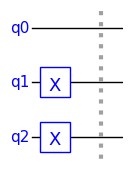

<IPython.core.display.Math object>

In [4]:
qc = QCircuit(3)
qc.x(1)  # Invert qubit 1
qc.x(2)  # Invert qubit 2
qc.barrier()
qc.draw()
qc.display_state()

The dotted vertical line is called a 'barrier' and can be used to separate the initialization from the main circuit for clarity.

The circuit can also be initialized with a random quantum state as follows. This is mainly useful for test purposes since a quantum circuit normally needs to be initialised to a known state.

In [5]:
qc = QCircuit(2, init='random')
qc.display_state(decimals=4)

<IPython.core.display.Math object>

Another possible way to initialize the state is to set the `state_vector` property. For example:

In [6]:
qc = QCircuit(3)
qc.state_vector = np.array([0, 0, 0, 1, 0, 0, 0, 0])
qc.display_state()

<IPython.core.display.Math object>

Note that setting the state vector does not form part of the circuit and does not get re-executed if the circuit is rerun.

### Adding Gates

The gates and other components that can be used to build a quantum circuit are described in tutorial 3. There are 30 types of gates included, which are: CCU, CCX, CH, CP, CRX, CRY, CRZ, CS, CSWAP, CT, CU, CX, CY, CZ, H, I, P, RX, RY, RZ, S, SDG, SWAP, SX, T, TDG, U, X, Y and Z. It is also possible to define custom gates, including ones with parameters and controls. See Tutorial 3 for further details.

The following simple example illustrates how gates are added to the circuit:

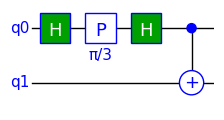

<IPython.core.display.Math object>

In [7]:
PI = '\u03C0'  # Unicode pi for annotation

qc = QCircuit(2)
qc.h(0)  # Add an H gate to qubit 0
qc.p(np.pi / 3, f'{PI}/3', 0)  # Add a pi/3 phase gate
qc.h(0)  # Add an H gate to qubit 0
qc.cx(0, 1)  # Add CX gate with qubit 0 as control
qc.draw()
qc.display_state(r'\ket{\psi} = ')

Gates are added to the circuit using the corresponding method of the QCircuit class. Gates are referred to by upper-case names, such as 'H', with the corresponding method name in lower-case to comply with Python naming conventions. TinyQsim uses the big-endian qubit convention in which qubit 0 is the most-significant qubit. This is drawn as the top qubit in the circuit diagram.

The arguments of most gates are  just a list of qubits although some gates have additional arguments for parameters. For example, the P gate shown above is a phase gate that has an extra parameter for the phase angle and another for an annotation that is displayed beneath the gate.

The gate shown with a '+' sign is a CX (controlled-NOT) gate, with the control signified by a dark dot. Gates with controls have the control qubits first, so 'cx(0,1)' treats qubit '0' as the control and qubit '1' as the target.

It is also possible to add instances of a single-qubit gate to a list of qubits with a single command. This is currently supported by the following gates:

- H, I, P, RX, RY, RZ, S, SDG, SC, T, TDG, X, Y, Z

For example:

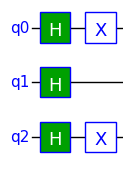

In [8]:
qc = QCircuit(3)
qc.h([0,1,2])
qc.x([0,2])
qc.z([]) # No effect
qc.draw()

### Registers

It is sometimes useful to split the set of qubits into registers that have different purposes (e.g. result, ancilla, etc). This can be done using Python iterables such as a range or list.

The following example shows a circuit with two registers 'reg1' and 'reg2' of 2 and 3 qubits respectively.

- Hadamard gates are applied to reg1 and X gates to reg2.
- A 'S' gate is applied to relative qubit 0 of reg2, which is absolute qubit 2.
- A 'T' gate is applied to relative qubit 2 of reg2, which is absolute qubit 4.
- reg1 is measured by using a '*reg1' to unpack the list of qubits as arguments.

It is even possible to select qubits with a list comprehension based on some predicate.

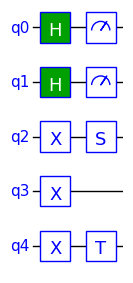

In [9]:
reg1 = range(0,2)
reg2 = range(2,5)
nqubits = len(reg1) + len(reg2)

qc = QCircuit(nqubits)
qc.h(reg1)
qc.x(reg2)
qc.s(reg2[0])
qc.t(reg2[2])
qc.measure(*reg1)
qc.draw()

Using the 'qubit_labels' method described below, it is possible to replace the default qubit labels 'q0,q1,...' by register-specific labels such as 'reg2[1]', if required.

### Drawing the Circuit

The quantum circuit is drawn using the 'draw' method:

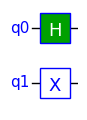

In [10]:
qc = QCircuit(2)
qc.h(0)
qc.x(1)
qc.draw()

The qubits are represented as horizontal lines on which the gates are placed. TinyQsim uses the big-endian qubit convention in which qubit 'q0' is the most-significant qubit. This qubit is drawn at the top of the diagram. Consequently, this circuit corresponds to the tensor product: $H \otimes X$.

We can add more components and draw the circuit again:

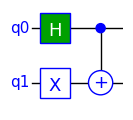

In [11]:
qc.cx(0, 1)
qc.draw()

We can draw the circuit and print its current state at any time as we build the circuit. There is no need to run the simulator explicitly, although there is an 'execute' method to re-execute a circuit if required, as discussed later.

In [12]:
qc.display_state()

<IPython.core.display.Math object>

The circuit diagram can be saved as a PNG file as follows:

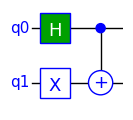

In [13]:
qc.draw(save='image.png')

The file is saved in the user's home directory by default, but an absolute or relative path name can be used if required.

### Panning and Zooming the Circuit

If the circuit has a large number of gates, it may get reduced in size to fit in the window. The way that the circuit is panned and zoomed depends on whether it is run in a Jupyter notebook or from a Python script:

#### (i) In a Jupyter Notebook

- Double click on the circuit in the notebook. This will zoom the circuit and display scroll bars.
- Then click on the area to the left of the qubit numbers. This will expand the view vertically so that all qubits are visible.
- If the circuit is too wide to fit in the window, the horizontal scroll bar can be used to explore the circuit.

#### (ii) In a Python Script

If TinyQsim is run from a Python script, instead of from a notebook, the circuit will appear in a window with controls at the bottom for zooming and panning the view. A region can be zoomed into with the magnifier tool and then the view can be panned using the pan tool (which has 4 arrows).

### Labelling the Qubits

By default, the qubit lines in the circuit diagram are labelled q0, q1, q2, etc. It is possible to add text to the labels as shown in the following example:

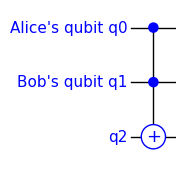

In [14]:
qc = QCircuit(3)
qc.qubit_labels({0: "Alice's qubit",
                 1: "Bob's qubit"})
qc.ccx(0, 1, 2)
qc.draw()

The labels are given as a Python dictionary. The dictionary need only contain entries for qubits that require a custom label. Other qubits will just get the default labels q0, q1,...

If required, the qubit numbers q0,q1... can be suppressed by adding the option 'numbers=False' to the 'qubit_labels' call. For example:

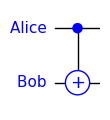

In [15]:
qc = QCircuit(2)
qc.cx(0, 1)
qc.qubit_labels({0: "Alice", 1: "Bob"}, numbers=False)
qc.draw()

It is sometimes useful to label qubits with the ket symbol $\ket{0}$ to make it clear they are initialised to $\ket{0}$.

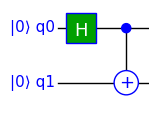

In [16]:
KET0 = '|0\u27E9'

qc = QCircuit(2)
qc.qubit_labels({0: KET0, 1: KET0})
qc.h(0)
qc.cx(0, 1)
qc.draw()

### Accessing the State

Consider the following circuit which generates the entangled state $\frac{1}{\sqrt{2}}\ket{01} + \frac{1}{\sqrt{2}}\ket{10}$.

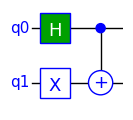

In [17]:
qc = QCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0, 1)
qc.draw()

The raw state_vector is available as a property of a QCircuit:

In [18]:
qc.state_vector

array([0.        , 0.70710678, 0.70710678, 0.        ])

However, we often just want to print the state in a human-readable form that relates to the components to the basis state labels.

The 'display_state' method uses LaTeX to pretty-print the state in a Jupyter notebook:

In [19]:
qc.display_state()

<IPython.core.display.Math object>

This 'sum-of-kets' representation is easy to relate to the mathematical representation:

$\quad\frac{1}{\sqrt{2}}\ket{01} + \frac{1}{\sqrt{2}}\ket{10}$

By default, 'display_state' prints 5 decimal places and omits values that round to zero. These defaults can be overridden as follows and a LaTeX prefix can be provided:

In [20]:
qc.display_state(r'\ket{\psi} = ', decimals=4, include_zeros=True)

<IPython.core.display.Math object>

LaTeX output is not available when a Python script is used instead of a Jupyter notebook. In this case, the state can be formatted as a text string using the 'format_state' method:

In [21]:
print(qc.format_state())

0.70711|01⟩ + 0.70711|10⟩


In [22]:
print(qc.format_state(decimals=7, include_zeros=True))

0|00⟩ + 0.7071068|01⟩ + 0.7071068|10⟩ + 0|11⟩


The 'sum-of-kets' representation is a nice format for simple states involving just a few terms, but can become difficult to read when the output occupies several lines. In this case, the 'table' format may be more appropriate:

In [23]:
print(qc.format_state('table'))

|01⟩  0.70711
|10⟩  0.70711


In [24]:
print(qc.format_state('table', decimals=7, include_zeros=True))

|00⟩  0
|01⟩  0.7071068
|10⟩  0.7071068
|11⟩  0


If there are more than a few qubits, the table may become quite large. In this case, only a few elements are printed at the start and end of the table, separated by an ellipsis. The maximum number of edge elements can be controlled by using the 'edge' option. This is illustrated here using a random 5-qubit quantum state:

In [25]:
qc = QCircuit(5, init='random')
print(qc.format_state('table', edge=3))

|00000⟩  (-0.13791-0.06515j)
|00001⟩  (0.27921+0.05702j)
|00010⟩  (-0.02789+0.09763j)
...
|11101⟩  (0.1044+0.1048j)
|11110⟩  (0.07644-0.21918j)
|11111⟩  (0.09898+0.01321j)


Setting 'edge=0' prints the whole table.

If the amplitude of a single element is required, such as $\ket{11101}$, it can be obtained from the state_vector as follows:

In [26]:
print(qc.state_vector[0b11101])

(0.10439995549313194+0.1047974042815284j)


Note that commands such as 'format_state' and 'display_state' are used interactively and do not form part of the circuit.

It is also possible to plot the state vector as either real and imaginary components or as magnitude and phase:

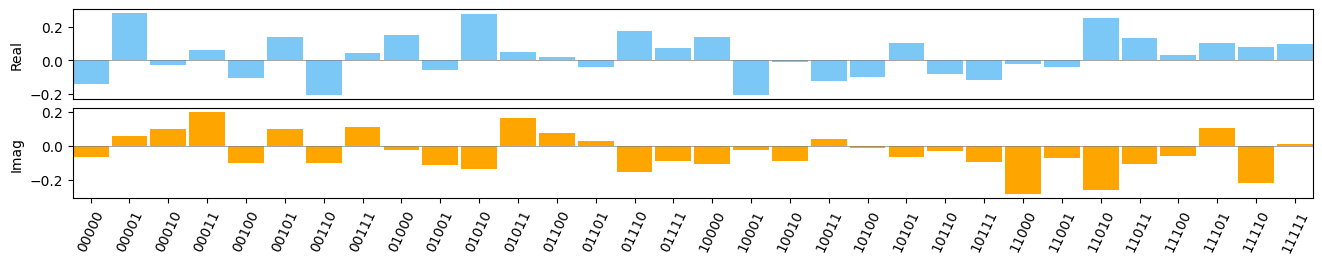

In [27]:
qc.plot_real_imag()

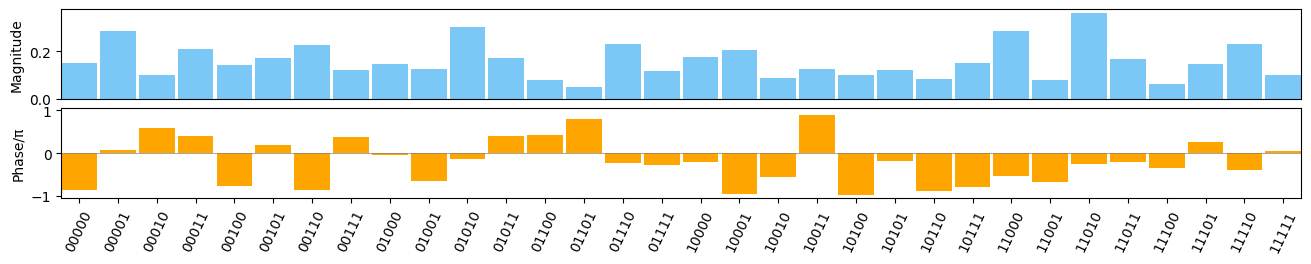

In [28]:
qc.plot_mag_phase()

When displayed in a Jupyter Notebook, it is possible to zoom and pan the plot in the same way as for the circuit diagrams, as described earlier. There are several optional arguments that can be used to configure or save the plots. See the API documentation for details.

### Probabilities

The probabilities of different measurement outcomes can be obtained as follows.

As an example, consider the following circuit:

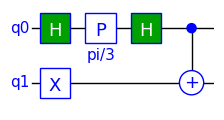

<IPython.core.display.Math object>

In [29]:
qc = QCircuit(2)
qc.x(1)
qc.h(0)
qc.p(np.pi / 3, 'pi/3', 0)
qc.h(0)
qc.cx(0, 1)
qc.draw()
qc.display_state(r'\ket{\psi} = ')

The probabilities of the possible measurement outcomes are the squares of the absolute values of the complex amplitudes in the state vector, which in this case are $[0, \frac{3}{4},  \frac{1}{4}, 0]$. This array of values can be obtained as a numpy array as follows:

In [30]:
qc.probability_array()

array([0.  , 0.75, 0.25, 0.  ])

However, we often just want to print the probabilities in an easily-readable form that relates them to the basis state labels. One way do this is using the 'format_probabilities' method. This method should be called in a 'print' statement for proper formatting.

In [31]:
print(qc.format_probabilities())

|01⟩  0.75
|10⟩  0.25


The format can be customised by specifying various options. For example:

In [32]:
print(qc.format_probabilities(include_zeros=True, decimals=4))

|00⟩  0
|01⟩  0.75
|10⟩  0.25
|11⟩  0


By default, trailing zeros on the decimal fraction are trimmed off. This can be overridden by setting 'trim=False':

In [33]:
print(qc.format_probabilities(include_zeros=True, decimals=4, trim=False))

|00⟩  0.0000
|01⟩  0.7500
|10⟩  0.2500
|11⟩  0.0000


Alternatively, the probabilities can be displayed as a histogram:

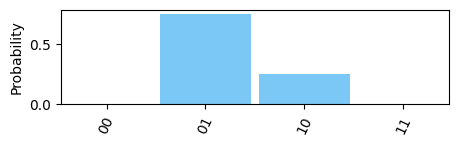

In [34]:
qc.plot_probabilities()

There are several optional arguments that can be used to configure or save the plots. See the API documentation for details.

The following example shows the probabilities for a random 5-qubit state:

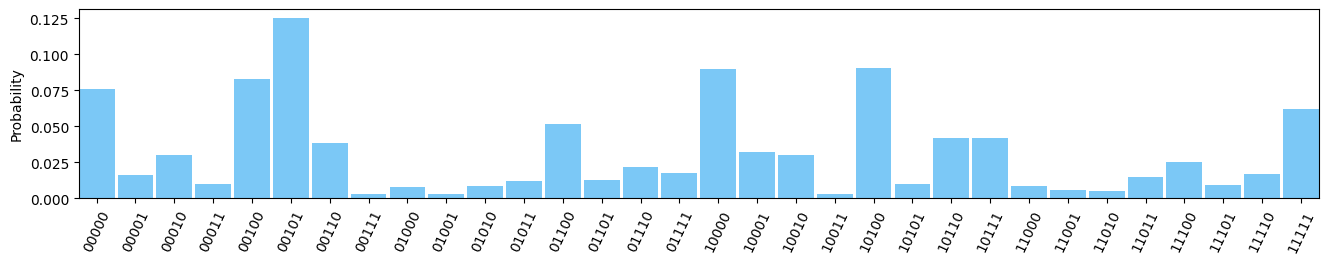

In [35]:
qc = QCircuit(5, init='random')
qc.plot_probabilities(height=2.0)

When displayed in a Jupyter Notebook or from a Python script, the histogram may be zoomed and panned, as described earlier, making this representation usable for up to about 10 qubits, although this has just over a thousand basis states.

The 'probability_array', format_probabilities' and 'plot_probabilities' methods can be given a list of arguments specifying the qubits to be considered. The probabilities are then summed over the other qubits that are not included.

### Quantum Measurement

#### General Approach

With a real quantum computer, the only way to get a result is to perform a quantum measurement that collapses the state to one of the basis states. Consequently, quantum circuits typically include measurements on the final state of each qubit. If probabilities are required, they can be estimated by running the program many times and looking at the frequencies of the various measurement outcomes.

The preferred approach for simulation with TinyQsim is to have quantum circuits that do not contain any measurements. This makes it possible to calculate the probabilities of the various measurement outcomes without having to run the circuit more than once. This gives a large performance advantage over a circuit containing measurements, which must be run hundreds of times to build up measurement counts to approximate the probabilities.

Measurements at the end of a circuit can simply be removed. Mid-circuit measurements are more tricky, but the circuit can in principle always be rearranged into an equivalent circuit with all measurements at the end, using the *Principle of deferred measurement*. These measurements can then be removed.

#### Simulated Counts

Sometimes, it is useful to see measurement counts, instead of just probabilities. If the circuit contains no measurements, then we can efficiently resample the probability distribution many times without rerunning the circuit. This operation is provided by the 'counts' and 'plot_counts' methods in their default 'resample' mode.

We will use the same example as before:

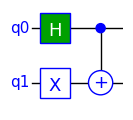

In [36]:
qc = QCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)
qc.draw()

In [37]:
qc.counts()

{'01': 511, '10': 489}

If we repeat the experiment, we are likely to get different values:

In [38]:
qc.counts()

{'01': 508, '10': 492}

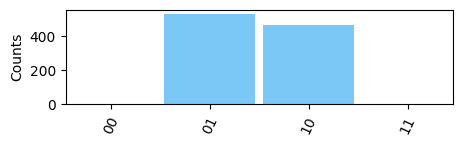

In [39]:
qc.plot_counts()

The result is similar to the one for probabilities except that it contains statistical variations.

Note that the measurement counts on a real quantum computer may also fluctuate as a result of noise and decoherence, but these effects are not modelled by TinyQsim.

#### Adding Measurements

A quantum measurement may be performed on one or more qubits. This collapses the state as it would on a real quantum computer.

The arguments specify the qubits to be measured. If they are omitted, all qubits are measured.

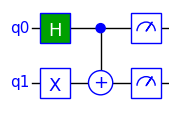

In [40]:
qc.measure()
qc.draw()

The results may be accessed from the return value of the 'measure' call. Alternatively, the 'results' method can called after the circuit has run, to get a dictionary of the last measured values for each measured qubit:

In [41]:
qc.results()

{0: 0, 1: 1}

If we now look at the state, we will find that it has collapsed to either $\ket{01}$ or $\ket{10}$:

In [42]:
qc.display_state()

<IPython.core.display.Math object>

#### Measurement Counts

If the circuit contains measurements, either the count option mode='measure' or mode='repeat' can be used to force re-execution of the whole circuit. If there are no measurements, then the default 'resample' mode is faster as the circuit is only executed once. This may be important when the circuit has many qubits.

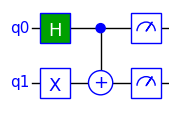

In [43]:
qc = QCircuit(2)
qc.x(1)
qc.h(0)
qc.cx(0, 1)
qc.measure()
qc.draw()

The following demonstrates the 'measure' mode:

In [44]:
qc.counts(mode='measure')

{'01': 515, '10': 485}

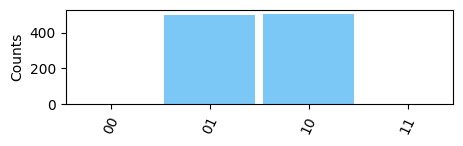

In [45]:
qc.plot_counts(mode='measure')

The 'repeat' mode is similar:

In [46]:
qc.counts(mode='repeat')

{'01': 487, '10': 513}

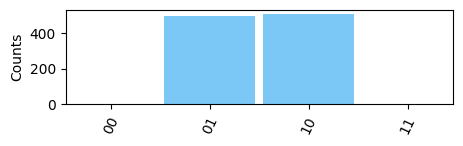

In [47]:
qc.plot_counts(mode='repeat')

It doesn't matter whether we use the 'measure' or 'repeat' mode on this simple circuit because the measurements are on the outputs.

The effect of the various count modes is as follows:

##### mode='measure'

Perform multiple executions of a circuit containing measurement operations. The results are counts of the measurement outcomes which are not necessarily on the circuit outputs. If there is no measurement "gate" on any of the requested qubits, the corresponding bit position in the output will be zero. If there are measurement operations on any qubits that are not requested, then their outcomes are not included in the output.

##### mode='repeat'

Perform multiple executions of the circuit, measuring the outputs once on each run. The circuit may contain measurement operations, including mid-circuit measurements. The results are samples of the output distribution rather than the measurement outcomes.

##### mode='resample'

Perform a single execution of the circuit and sample the resulting probability distribution multiple times. The circuit should not contain any measurement operations. This mode is much faster than the 'repeat' and 'measure' modes. This is the default mode that is used for circuits that do not contain measurements.

See the QCircuit API documentation for further details.

### Reset

Reset is an experimental feature and its use is not recommended.

The 'reset' operation resets a qubit to the $\ket{0}$ state. One application is to allow a qubit to be reused, which may be useful since the maximum number of qubits available is quite limited. For example, ancilla qubits may no longer be needed once they have been used, so it may be possible to reset them and reuse them in a later part of the circuit.

<IPython.core.display.Math object>

<IPython.core.display.Math object>

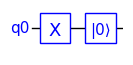

In [48]:
qc = QCircuit(1)
qc.x(0)
qc.display_state(r'\textrm{Before}:')
qc.reset(0)  # Reset qubit 0 to |0>
qc.display_state(r'\textrm{After}:')
qc.draw()

The behaviour of reset is equivalent to a measurement of the qubit followed by an X operation conditional on the measurement result being 1. This forces the qubit into the $\ket{0}$ state. Any other qubits that were entangled with the reset qubit are affected in the same way as if the reset were a measurement.

Although 'reset' effectively performs a measurement, it is not included in the output of the 'results' call. If this is needed, the 'reset' should be preceded by an explicit measurement.

### Sub-Circuits

TinyQsim does not provide explicit support for defining sub-circuits. However, a sub-circuit may be defined as a Python function and then used in a QCircuit.

This is illustrated by the following example that defines a function 'interfere'. This creates single-qubit interference by creating a superposition of $\ket{0}$ and $\ket{1}$ and then interfering them with a relative phase angle. The function has arguments to specify the qubit to which it is applied, the phase angle and a label.

In [49]:
def interfere(qc, qubit: int, phase: float, label: str):
    qc.h(qubit)
    qc.p(phase, label, qubit)
    qc.h(qubit)

We can then use this in different circuits or multiple times in the same circuit.

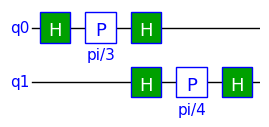

|00⟩  0.64017
|01⟩  0.10983
|10⟩  0.21339
|11⟩  0.03661


In [50]:
qc = QCircuit(2)
interfere(qc, 0, np.pi / 3, 'pi/3')
interfere(qc, 1, np.pi / 4, 'pi/4')

qc.draw()
print(qc.format_probabilities())

### Re-Execution

TinyQsim executes each gate as it is added to the circuit so that the state is always up-to-date. This is very convenient as it avoids having to explicitly run a simulator on the circuit. However, it is sometimes useful to be able to re-run a circuit.

Consider a simple circuit that creates a Bell state:

In [51]:
qc = QCircuit(2)
qc.h(0)
qc.cx(0, 1)

Suppose that we wish to run the circuit 4 times, with the inputs $\ket{00}$, $\ket{01}$, $\ket{10}$ and $\ket{11}$ to generate the 4 Bell states:

We can use the 'execute' method to re-run the circuit multiple times. The state will be initialized by setting the 'state_vector' property to a different value each time. Consequently, 'execute' will be called with the 'init' option 'none', so that the normal initialization of the state to $\ket{00\dots 0}$ is skipped.

The numpy 'eye(N)' function creates an 'NxN' identity matrix, the rows of which are the state vectors of the basis states. This provides a convenient way to iterate over the basis vectors.

In [52]:
for init in np.eye(4):
    qc.state_vector = init
    qc.execute(init='none')
    print(qc.format_state())

0.70711|00⟩ + 0.70711|11⟩
0.70711|01⟩ + 0.70711|10⟩
0.70711|00⟩ - 0.70711|11⟩
0.70711|01⟩ - 0.70711|10⟩


Another way to obtain the same result would be re-create the circuit each time:

In [53]:
for init in np.eye(4):
    qc = QCircuit(2)
    qc.state_vector = init
    # Create the circuit
    qc.h(0)
    qc.cx(0, 1)
    print(qc.format_state())

0.70711|00⟩ + 0.70711|11⟩
0.70711|01⟩ + 0.70711|10⟩
0.70711|00⟩ - 0.70711|11⟩
0.70711|01⟩ - 0.70711|10⟩


### LaTeX Formatting

States, arrays and matrices can be formatted as LaTeX and included in Jupyter notebooks or cut-and-pasted into LaTeX or Markdown documents.

#### Displaying the State

For this example, we will create a tripartite entanglement known as a GHZ state:

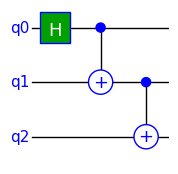

In [54]:
qc = QCircuit(3)
qc.h(0)
qc.cx(0, 1)
qc.cx(1, 2)
qc.draw()

The state can be displayed in a notebook using the 'display_state' method, as discussed earlier. A LaTeX prefix can be included if required and the number of decimal places can be specified:

In [55]:
qc.display_state()

<IPython.core.display.Math object>

In [56]:
qc.display_state(r'\ket{\psi} = ', decimals=4)

<IPython.core.display.Math object>

#### Accessing the Raw LaTeX

The raw LaTeX can be obtained for inclusion in other documents, as follows:

In [57]:
print(qc.format_state('latex', decimals=4))

0.7071\ \ket{000} + 0.7071\ \ket{111}


#### LaTeX Arrays and Matrices

The 'latex_array' function can be used to format a numpy 1D or 2D array as a LaTeX string:

In [58]:
from tinyqsim.format import latex_array
from IPython.display import Math

print(latex_array(qc.state_vector))

\begin{bmatrix}0.7071&0.0&0.0&0.0&0.0&0.0&0.0&0.7071 \end{bmatrix}


This can be displayed in a notebook as follows:

In [59]:
display(Math(latex_array(qc.state_vector, decimals=4)))

<IPython.core.display.Math object>

The following example shows how the unitary matrix of the CX gate can be displayed:

In [60]:
from tinyqsim.gates import CX

display(Math(latex_array(CX, r'\text{CX} = ')))

<IPython.core.display.Math object>

The 'display' call can be omitted for the last line in a notebook cell.

### The Unitary Matrix of a Circuit

It is occasionally useful to obtain the unitary matrix corresponding to a circuit. This can be done with the QCircuit 'to_unitary' method, as shown in the following example. 

The unitary matrix of a K-qubit circuit has $2^{2K}$ elements, so it can become very large. Consequently, this method is mostly useful for small circuits.

In [61]:
qc = QCircuit(2)
qc.h(0)
qc.cx(0, 1)
u = qc.to_unitary()
print(u)

[[ 0.70710678  0.          0.70710678  0.        ]
 [ 0.          0.70710678  0.          0.70710678]
 [ 0.          0.70710678  0.         -0.70710678]
 [ 0.70710678  0.         -0.70710678  0.        ]]


This unitary matrix can be pretty-printed using LaTeX if required and a LaTeX prefix can be provided.

In the following example, a factor of $\frac{1}{\sqrt{2}}$ is extracted and included in the prefix:

In [62]:
from math import sqrt
from tinyqsim.format import latex_array
from IPython.display import Math

Math(latex_array(u * sqrt(2), r'\text{U} = \frac{1}{\sqrt{2}}'))

<IPython.core.display.Math object>

### Bloch Sphere

The state of a qubit may be mapped onto a sphere, known as the Bloch sphere:

$\quad\ket{\psi} = \cos(\frac{\theta}{2})\ket{0} + e^{i\phi} \sin(\frac{\theta}{2})\ket{1}$

where $0 \le\theta\le\pi\,$ and $\,0\le\phi\le2\pi$.

<div style="text-align: center;">
<img src="assets/bloch.png" alt="bloch" width="300"/>
</div>

The Bloch sphere is mainly useful for single qubits because the qubits of a multi-qubit system can become *entangled* such that the qubits no longer have individual pure states. However, the sphere is a useful way to visualize and learn about the effects of single-qubit gates, which can then be used as part of a multi-qubit system.

The following example shows how to create a one-qubit quantum circuit, use gates to configure the state and then plot the state on the Bloch sphere.

<IPython.core.display.Math object>

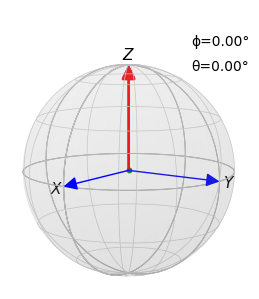

In [63]:
qc = QCircuit(1)  # This must be 1 qubit
qc.display_state(prefix=r'\ket{\phi} = ')
qc.plot_bloch()

The initial $\ket{0}$ state is shown by the red arrow.

We can apply some gates and observe the effect on the state vector:

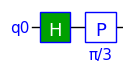

<IPython.core.display.Math object>

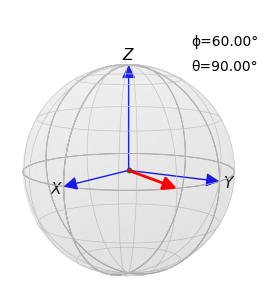

In [64]:
PI = '\u03C0'  # Unicode pi

qc.h(0)
qc.p(np.pi / 3, f'{PI}/3', 0)
qc.draw()
qc.display_state(prefix=r'\ket{\phi} = ')
qc.plot_bloch()

The Hadamard gate rotates the state vector from its initial +Z direction $\ket{0}$ to the +X direction $\ket{+}$. Then the P($\pi$/3) gate rotates it by $\pi/3$ radians clockwise about the Z axis to the position shown by the red arrow.

The sphere can be rotated with the mouse when run from a Python script. When run from a Jupyter notebook, the orientation is fixed but the view point can be set using the optional parameters 'azimuth' and 'elevation' (given in degrees).

It is also possible to display the Bloch sphere with a vector defined by a pair of angles, $\phi$ and $\theta$. For example:

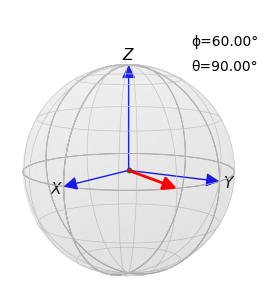

In [65]:
from tinyqsim.bloch import plot_bloch_angles

phi = np.pi / 3
theta = np.pi / 2
plot_bloch_angles(phi, theta)

### Export to OpenQASM

The circuit may be output in OpenQASM-3.0 format as shown in the following example.

This is an experimental feature but may be useful for transferring circuits to other tools. Most of the TinyQsim gates are supported with the exception of 'i', 'cs', 'ct', u, 'cu' and 'ccu'. Other commands such as 'measure', 'reset' and 'barrier' are not currently supported.

Be aware that TinyQsim uses the big-endian qubit convention, whereas OpenQasm assumes little-endian.

In [66]:
qc = QCircuit(2)
qc.h(0)
qc.x(1)
qc.cx(0, 1)
qasm = qc.to_qasm()
print(qasm)

OPENQASM 3;
include "stdgates.inc";
qreg q[2];
h q[0];
x q[1];
cx q[0],q[1];

